In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import log_loss, accuracy_score, mean_squared_error as mse
from sklearn.model_selection import train_test_split

# Dataset 
- UCI adult
- UCI housing 

In [2]:
housing_names = ["f" + str(i) for i in range(13)] + ["price"]
adult_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours",
    "native",
    "class"
]
housing = pd.read_fwf("housing.fwf", names=housing_names)
adult = pd.read_csv("adult.data", names=adult_names)

In [3]:
print("housing size:",housing.shape)
print("adult size:",adult.shape)

housing size: (506, 14)
adult size: (32561, 15)


In [4]:
adult.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours,native,class
14096,53,Private,152810,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,55,United-States,>50K
15388,35,Private,188888,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,>50K
2925,49,Private,101320,Assoc-acdm,12,Married-civ-spouse,Sales,Wife,White,Female,0,1902,40,United-States,>50K


In [5]:
housing.sample(3)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,price
440,2.05110,0.0,18.10,0,0.740,5.818,92.4,1.8662,4,666.0,20.2,391.45,22.11,10.5
199,0.03150,95.0,1.47,0,0.403,6.975,15.3,7.6534,3,402.0,17.0,396.90,4.56,34.9
246,0.33983,22.0,5.86,0,0.431,6.108,34.9,8.0555,7,330.0,19.1,390.18,9.16,24.3


# Preprocessing

## Convert to categorical datatype

In [6]:
encoder = LabelEncoder()

for col in adult_names:
    if adult[col].dtype == "object":
        adult[col] = encoder.fit_transform(adult[col])

## Normalization

In [7]:
scaler = MinMaxScaler()
adult = scaler.fit_transform(adult)
housing = scaler.fit_transform(housing)

## Train test split

In [8]:
X_adult, y_adult = adult[:, :-1], adult[:, -1]
X_housing, y_housing = housing[:, :-1], housing[:, -1]
print(X_adult.shape, y_adult.shape)
print(X_housing.shape, y_housing.shape)

(32561, 14) (32561,)
(506, 13) (506,)


In [9]:
x_train_adult, x_test_adult, y_train_adult, y_test_adult = train_test_split(X_adult, y_adult, train_size=0.8)
x_train_housing, x_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, train_size=0.8)

In [10]:
x_train_adult.shape, x_test_adult.shape, y_train_adult.shape, y_test_adult.shape

((26048, 14), (6513, 14), (26048,), (6513,))

## Modeling

adult dataset: model 1 - regression

In [37]:
ad_regression = Sequential([
    Dense(units=10, input_dim= X_adult.shape[1], activation="relu"),
    Dense(units=20,activation="relu"),
    Dense(units=20,activation="relu"),
    Dense(units=1, activation="sigmoid")
])
ad_regression.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                150       
                                                                 
 dense_5 (Dense)             (None, 20)                220       
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________


In [38]:
ad_regression.compile(optimizer="adam", loss="MSE", metrics=["accuracy"])

In [39]:
history_ad_reg = ad_regression.fit(x_train_adult, y_train_adult, epochs=10, validation_split=0.2, verbose=0)

In [40]:
import matplotlib.pyplot as plt

In [41]:
def plot_history(history, metrics, model_name:str):
    fig = plt.figure(figsize=[8, 4])
    for metric in metrics:
        plt.plot(history.history[metric], label='train '+ metric)
        plt.plot(history.history['val_' + metric], label='val ' + metric)        
    plt.legend()
    
    plt.title(model_name + " training history [" + " ".join(metrics) + "]")

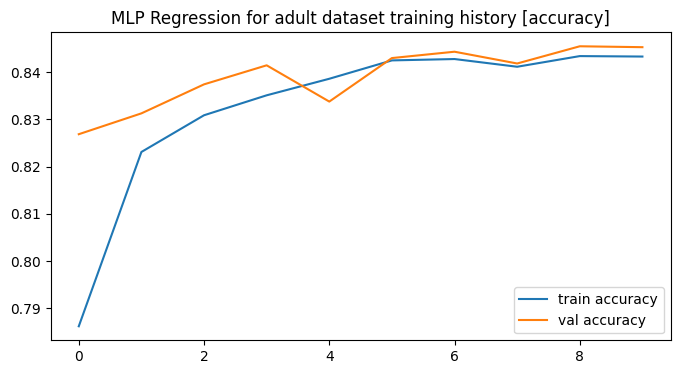

In [42]:
plot_history(history=history_ad_reg, metrics=["accuracy"],model_name="MLP Regression for adult dataset")

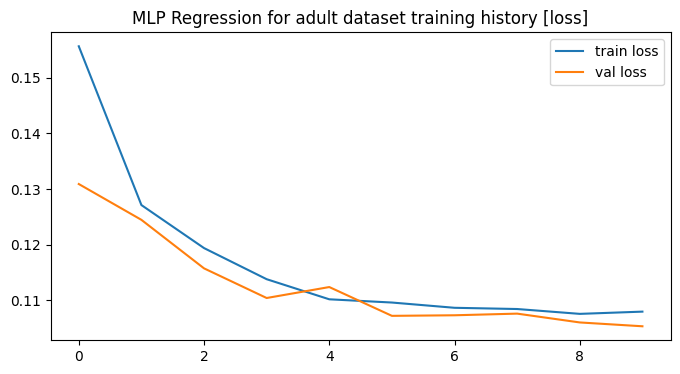

In [43]:
plot_history(history=history_ad_reg, metrics=["loss"], model_name="MLP Regression for adult dataset")

model 1 evaluation